# Analysis of bird-building collisions in Chicago over 39 years (1978 - 2016)


![Picture1](Picture1.gif)

# **Data used**

Chicago collision data: Chicago_collision_data.csv contains records of collisions from McCormick Place (MP) and the rest of Chicago (CHI) used in the analyses in this paper.
McCormick Place light scores: light_levels_dryad.csv which contains the light level data for MP (McCormack Place). This data indicates the status of night-time lighting at McCormick Place during pre-dawn walks to collect collisions by recording the proportion of the 17 window bays that were illuminated.
Each entry in the Chicago_collision_data.csv is a record of a bird collision with a building.

**Reference**: Nocturnal flight-calling behaviour predicts vulnerability to artificial light in migratory birds
Benjamin M. Winger, Brian C. Weeks, Andrew Farnsworth, Andrew W. Jones, Mary Hennen and David E. Willard
Published:03 April 2019https://doi.org/10.1098/rspb.2019.0364




# Aims of this analysis:
## 1) Import the CSVs for the Chicago bird-building collision data and the light level data for McCormack Place. Get a feel for the data and check for missing values.
## 2) Find out statistics about the bird-building collisions in with respect to the years and perform linear regression on number of collisions VS the year
## 3) Compare the number of collisions with respect to the locality (MP or CH)
## 4) Find out how the collision count vary with the light levels in McCormack Place (MP)
## 5) Analyse and visualize the relationship between the year, number of collisions and lightscores in McCormack Place

In [2]:
# Importing the required packages for the data analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

## Aim 1) Import the CSVs for the Chicago bird-building collision data and the light level data for McCormack Place. Get a feel for the data and check for missing values.

**1) a) Exploring the columns and data type information in the chicago_collisions dataframe, and getting the first 5 rows.**

In [3]:
# Making dataframe from the Chicago collision CSV
chicago_collisions = pd.read_csv("Chicago_collision_data.csv")
print(chicago_collisions.info())
print(chicago_collisions.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69784 entries, 0 to 69783
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Genus     69784 non-null  object
 1   Species   69784 non-null  object
 2   Date      69784 non-null  object
 3   Locality  69784 non-null  object
dtypes: object(4)
memory usage: 2.1+ MB
None
        Genus  Species        Date Locality
0  Ammodramus  nelsoni  1982-10-03       MP
1  Ammodramus  nelsoni  1984-05-21      CHI
2  Ammodramus  nelsoni  1984-05-25       MP
3  Ammodramus  nelsoni  1985-10-08       MP
4  Ammodramus  nelsoni  1986-09-10       MP


**There are 69784 records in total and no missing values in any of the columns.
Each row contains data about the genus and species of the bird, the date of the collision and the locality where it happened.**

**1) b) Exploring the column data types and rows in the light_levels_mp dataframe and getting the first 5 rows.**

In [4]:
# Making dataframe of using light_levels_dryad.csv which contains the light level data for MP (McCormack Place)
light_levels_mp = pd.read_csv("Light_levels_dryad.csv")
print(light_levels_mp.info())
print(light_levels_mp.head())
#print(light_levels_mp["Light_Score"].mean())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3067 entries, 0 to 3066
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         3067 non-null   object
 1   Light_Score  3067 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 48.0+ KB
None
         Date  Light_Score
0  2000-03-06            3
1  2000-03-08           15
2  2000-03-10            3
3  2000-03-31            3
4  2000-04-02           17


**There are 3067 entries and no missing values in any of the columns. Each row contains the light scores recorded for McCormack Place and the date on which it was recorded.**

In [5]:
#Adding year column to the dataframe
chicago_collisions["year"] = pd.DatetimeIndex(chicago_collisions['Date']).year
print(chicago_collisions.head())

        Genus  Species        Date Locality  year
0  Ammodramus  nelsoni  1982-10-03       MP  1982
1  Ammodramus  nelsoni  1984-05-21      CHI  1984
2  Ammodramus  nelsoni  1984-05-25       MP  1984
3  Ammodramus  nelsoni  1985-10-08       MP  1985
4  Ammodramus  nelsoni  1986-09-10       MP  1986


## Aim 2) Find out statistics about the bird-building collisions in with respect to the years and perform linear regression on number of collisions VS the year

**2) a) Find out statistics about the bird-building collisions with respect to the years**

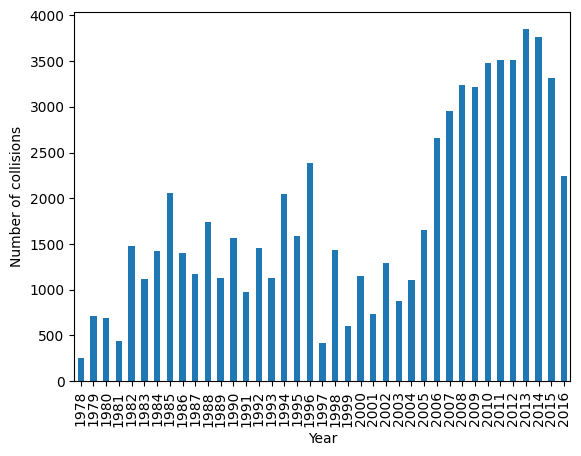

In [6]:
# Creating a Series of number of collisions each year
ch_collisions_by_yr = chicago_collisions["year"].value_counts(sort = True)
ch_collisions_by_yr.sort_index(ascending=True).plot.bar()
plt.xlabel('Year')
plt.ylabel('Number of collisions')
plt.show()

In [7]:
#mean and standard deviation for the number of collisions per year
print("The mean for collision count per year over the period of 38 years from 1978 to 2016 is: ",                               np.mean(ch_collisions_by_yr))
print("The mean for collision count per year over the period of 38 years from 1978 to 2016 is: ",                               np.std(ch_collisions_by_yr))
print("The highest collision count in a year i.e.",np.max(ch_collisions_by_yr)," occured in the year ",                       ch_collisions_by_yr.idxmax())
print("The lowest collision count i.e.", np.min(ch_collisions_by_yr), "occured in the year ",                           ch_collisions_by_yr.idxmin())

The mean for collision count per year over the period of 38 years from 1978 to 2016 is:  1789.3333333333333
The mean for collision count per year over the period of 38 years from 1978 to 2016 is:  1040.2895142720001
The highest collision count in a year i.e. 3849  occured in the year  2013
The lowest collision count i.e. 251 occured in the year  1978


**2) b) Perform linear regression on number of collisions VS the year**

In [8]:
# Creating dataframe of bird collisions in chicago per year from ch_collisions_by_yr series
chicago_yr_collision_df=pd.DataFrame({'year':ch_collisions_by_yr.index, 'collision_count':ch_collisions_by_yr.values})

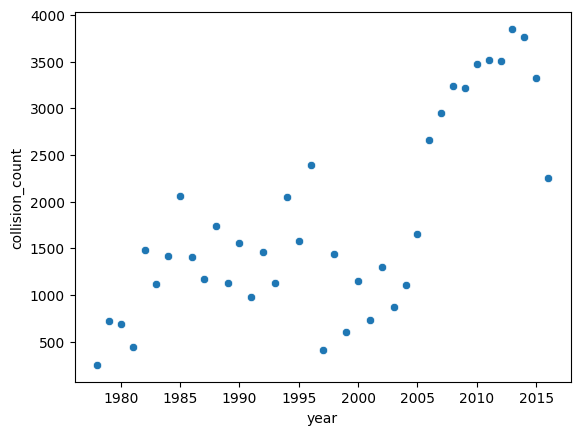

In [9]:
# Scatterplot of collision_count VS Year
sns.scatterplot(data = chicago_yr_collision_df, x="year", y="collision_count")
plt.show()

In [10]:
# Linear regression of number of collisions over years
xs = chicago_yr_collision_df["year"]
ys = chicago_yr_collision_df["collision_count"]
res = linregress(xs,ys)
print(res)

LinregressResult(slope=67.78259109311739, intercept=-133572.50107962207, rvalue=0.7333226790048711, pvalue=1.0977506888588285e-07, stderr=10.33129920919594, intercept_stderr=20631.93216744486)


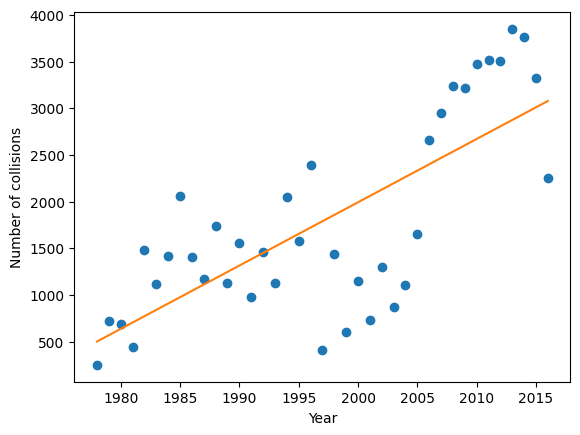

In [11]:
# Line of best fit
plt.plot(xs,ys,'o')
fx = np.array([xs.min(),xs.max()])
fy = fx * res.slope + res.intercept
plt.plot(fx,fy,'-')
plt.xlabel("Year")
plt.ylabel("Number of collisions")
plt.show()

**The rvalue of 0.733 in LinregressResult is the Pearson's correlation coefficient. This signifies a strong relationship between the number of collision count and the year. The slope captures the strength of the effect in the relationship. The estimated slope of 67.78 means that we can expect an increase of about 68 in number of collisions as we go from one year to the next.**

## Aim 3) Compare the number of collisions with respect to the locality (MP or CH)

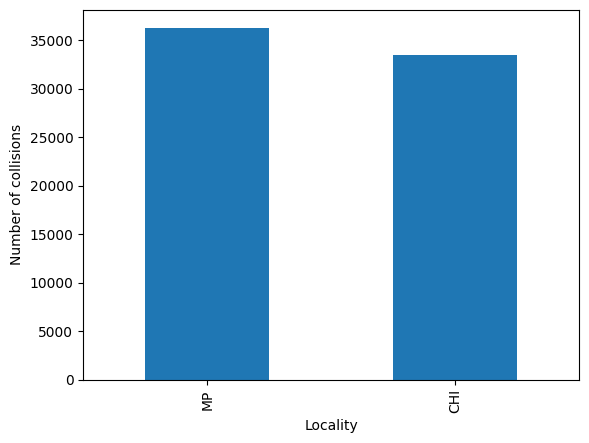

In [12]:
# Using locality(Chicago and McCormack Place) as a categorical variable for bar plot
chicago_collisions_by_locality = chicago_collisions["Locality"].value_counts(sort = True)
chicago_collisions_by_locality.plot.bar()
plt.xlabel('Locality')
plt.ylabel('Number of collisions')
plt.show()

In [23]:
print("The number of collisions recorded in McCormack place is ", chicago_collisions_by_locality['MP'])
print("The number of collisions recorded in the rest of Chicago is ", chicago_collisions_by_locality['CHI'])

The number of collisions recorded in McCormack place is  36315
The number of collisions recorded in the rest of Chicago is  33469


**The number of collisions recorded in McCormack Place is higher than the rest of Chicago.**

## Aim 4) Find out how the collision count vary with the light levels in McCormack Place (MP)

In [13]:
# Subset the collisions in MP (McCormack Place) and check the relationship between light levels and number of collisions. Join required on date column with the light levels table
chicago_collisions_mp = chicago_collisions[chicago_collisions["Locality"]=="MP"]

In [14]:
# Create a dataframe using inner join on the date column from chicago_collisions_mp and light_levels_mp
collisions_mp_light_levels = chicago_collisions_mp.merge(light_levels_mp,on="Date")

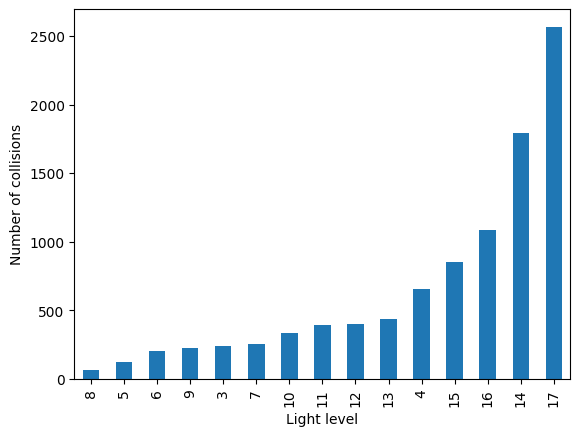

In [15]:
# Plotting the number of collisions for each light level score
collisions_mp_light_levels["Light_Score"].value_counts().sort_values().plot.bar()
plt.xlabel('Light level')
plt.ylabel('Number of collisions')
plt.show()

**From the above barplot, we can see that higher number of collisions are associated with higher light level score.**

## Aim 5) Analyse and visualize the relationship between the year, number of collisions and lightscores in McCormack Place

**To do this we require one dataframe that contains rows for year, number of collisions and mean lightscore for that year. To achieve this we need to create two dataframes:**

**1) mp_mean_lightscore_by_year_df with the year and mean lightscore columns for McCormack Place(MP)**

**2) mp_collisions_by_yr_df with the year and collisions columns for McCormack Place (MP)**

**Then we need to merge them to create mp_collisions_lightscores_by_year_df that contains the required information to visualize the relationship amongst the number of collision, year and light scores in McCormack Place(MP).**

In [16]:
# Making a dataframe with the mean light scores by year for MP (McCormack Place)
mean_lightscore_by_year_mp_series = collisions_mp_light_levels.groupby("year")["Light_Score"].mean()
mp_mean_lightscore_by_year_df = pd.DataFrame({"year":mean_lightscore_by_year_mp_series.index,"mean_lightscore":mean_lightscore_by_year_mp_series.values}) 

In [17]:
# Subset ch_collisions_by_yr for Locality = MP, find collision counts by year and put in a dataframe
mp_collisions = chicago_collisions[chicago_collisions["Locality"]=="MP"]
mp_collisions_by_yr = mp_collisions["year"].value_counts()
mp_collisions_by_yr_df = pd.DataFrame({"year":mp_collisions_by_yr.index, "collisions":mp_collisions_by_yr.values})

**Joining mp_collisions_by_yr_df and mp_mean_lightscore_by_year_df to get year, collisions and mean light score in one dataframe.**

In [18]:
# Joining the mp_collisions_by_yr_df and mean_lightscore_by_year_mp_df and sorting values by year
mp_collisions_lightscores_by_year_df = mp_collisions_by_yr_df.merge(mp_mean_lightscore_by_year_df, on="year").sort_values("year")

In [19]:
# Adding lightscore_grade (categorical) column to mp_collisions_lightscores_by_year_df. The grade column is based on the bins defined as A(10-11),B(11-12),C(12-13),D(13-14),E(14-15). 

print(mp_collisions_lightscores_by_year_df["mean_lightscore"].max())           
print(mp_collisions_lightscores_by_year_df["mean_lightscore"].min())
bins = [10, 11, 12, 13, 14, 15]
labels = ['A', 'B', 'C', 'D', 'E']                      
mp_collisions_lightscores_by_year_df['lightscore_grade'] = pd.cut(x = mp_collisions_lightscores_by_year_df['mean_lightscore'], bins = bins, labels = labels, include_lowest = True)
print(mp_collisions_lightscores_by_year_df.head())

14.906586826347306
10.129675810473815
    year  collisions  mean_lightscore lightscore_grade
0   2000        1025        14.289700                E
8   2001         597        12.793814                C
2   2002         825        13.741488                D
10  2003         472        12.172260                C
6   2004         662        14.001515                E


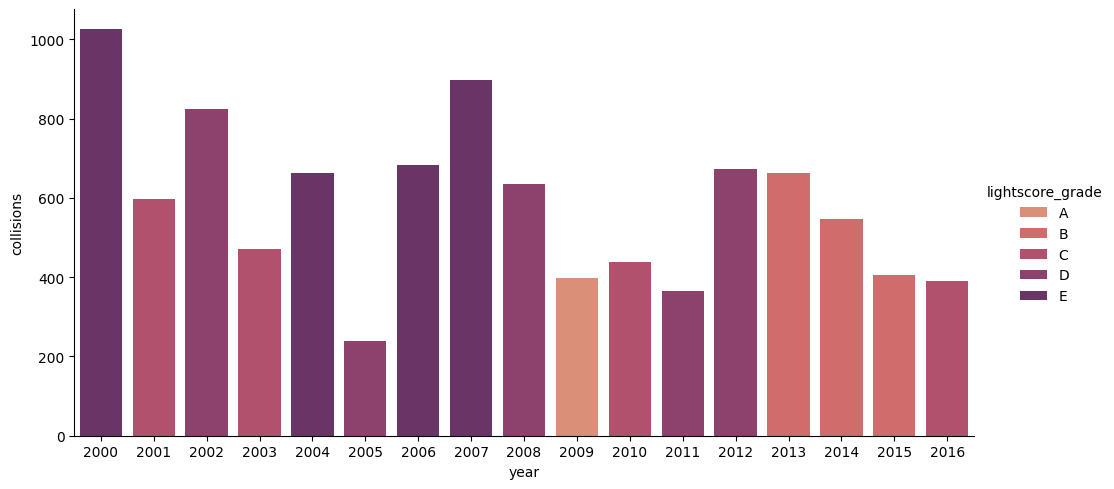

In [20]:
# Visualizing the relationship amongst the year, number of collisions and lightscore_grade
sns.catplot(data=mp_collisions_lightscores_by_year_df, x='year',y='collisions',hue='lightscore_grade',kind='bar', aspect = 2,palette='flare', dodge=False)
sns.despine()
plt.show()

**The top 5 years with the most number of collisions have a lightscore_grade of E or D which correspond to high light levels in McCormack Place.**

In [21]:
# Calculating correlation amongst collision, year and mean lightscores
print(mp_collisions_lightscores_by_year_df.corr())

                     year  collisions  mean_lightscore
year             1.000000   -0.459722        -0.500091
collisions      -0.459722    1.000000         0.628857
mean_lightscore -0.500091    0.628857         1.000000


**The Pearson's correlation coefficient for the number of collisions and mean lightscore 0.629 which signifies a moderately strong relationship. This means that if we are given a light score then we can predict the number of collisions with some confidence.**

**The Pearson's correlation coefficient for the number of collisions and year is -0.46 which signifies a moderately strong inverse relationship, i.e. the number of collisions are decreasing as the years progress and we can predict the number of collisions for a given year with some confidence.**

**However, we cannot say conclusively that the higher light levels in the night are causing more bird-building collisions or the progression of years is causing less collisions as correlation does not give us any information about causation.**